In [1]:
#Load Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn import tree
from os import system
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
#rf ensemble setup
from sklearn.ensemble import VotingClassifier
from scipy.stats import mode
from IPython.display import SVG
#rf ensemble setup

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
import category_encoders as ce
from xgboost.sklearn import XGBRegressor
from sklearn import preprocessing
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import utils
import eli5
from graphviz import Source
from sklearn import tree
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import  scatter_matrix
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pandas.api.types import CategoricalDtype
from collections import defaultdict


In [2]:
import pandas as pd
from datetime import datetime

# Load the dataset
df = pd.read_csv('fake_job_postings.csv')

# Print summary statistics of the dataset
print(df.describe(include='all'))

# Print summary statistics grouped by the target variable
target_variable = 'fraudulent'
print(df.groupby(target_variable).describe(include='all'))

# Drop the job_id column
df.drop('job_id', axis=1, inplace=True)

# Print the number of rows and columns in the dataset
rows, columns = df.shape
print(f'Number of rows: {rows}\nNumber of columns: {columns}')

# Check for missing data
missing_data = df.isnull().sum()
print(f"Missing data:\n{missing_data}\n")

# Fill missing values in the target variable with its mean value
mean_value = df[target_variable].mean()
df[target_variable].fillna(mean_value, inplace=True)

# Print the current time
print(f"Current time is: {datetime.now()}")


              job_id                    title         location department  \
count   17880.000000                    17880            17534       6333   
unique           NaN                    11231             3105       1337   
top              NaN  English Teacher Abroad   GB, LND, London      Sales   
freq             NaN                      311              718        551   
mean     8940.500000                      NaN              NaN        NaN   
std      5161.655742                      NaN              NaN        NaN   
min         1.000000                      NaN              NaN        NaN   
25%      4470.750000                      NaN              NaN        NaN   
50%      8940.500000                      NaN              NaN        NaN   
75%     13410.250000                      NaN              NaN        NaN   
max     17880.000000                      NaN              NaN        NaN   

       salary_range                                    company_profile  \
c

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Separate the categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values in numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

# Fill missing values in categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for cat_col in categorical_columns:
    df[cat_col] = le.fit_transform(df[cat_col].astype(str))

# Print the shape of the dataset
print("Shape of the dataset: ", df.shape)

# Print summary statistics of the dataset
print("Summary statistics of the dataset:")
print(df.describe(include='all'))

# Print summary statistics grouped by the target variable
target_variable = 'fraudulent'
print("Summary statistics grouped by the target variable:")
print(df.groupby(target_variable).describe(include='all'))

# Print information about the dataset
print("Information about the dataset:")
print(df.info())

# Print data grouped by the target variable
for grp, data in df.groupby(target_variable):
    print(grp, data)

# Check the class balance
print("Class balance: ")
print(df.groupby(target_variable).size())


# Analyze the entire dataset
print("Summary statistics of the entire dataset:")
print(df.describe())

# Print the current time
print("Current time is:", datetime.now())

Shape of the dataset:  (17880, 17)
Summary statistics of the dataset:
              title      location    department  salary_range  \
count  17880.000000  17880.000000  17880.000000  17880.000000   
mean    5408.917897   1534.555984    923.165101     74.000112   
std     3241.045496    891.549955    269.411777    196.312553   
min        0.000000      0.000000      0.000000      0.000000   
25%     2550.750000    772.000000    932.000000      0.000000   
50%     5226.500000   1557.500000   1054.000000      0.000000   
75%     8273.000000   2385.000000   1054.000000      0.000000   
max    11230.000000   3104.000000   1336.000000    873.000000   

       company_profile   description  requirements      benefits  \
count     17880.000000  17880.000000  17880.000000  17880.000000   
mean       1032.498658   7384.506264   6604.590548   3491.570302   
std         499.202654   4223.558301   3476.486219   1419.944550   
min           0.000000      0.000000      0.000000      0.000000   
25% 

In [4]:

cat_cols = ['fraudulent', 'title', 'location', 'department', 'salary_range',
            'company_profile', 'description', 'requirements', 'benefits',
            'employment_type', 'required_experience', 'required_education',
            'industry', 'function']

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    return df.astype(np.float64)

try:
    df = clean_dataset(df)
except Exception as e:
    print("error_preprocess_clean_dataset")
    print(str(e))

try:
    ce_ord = ce.OrdinalEncoder(cols=cat_cols)
    df = ce_ord.fit_transform(df)
    
#     outdata1 = outdata[['fraudulent', 'company_profile', 'location']]
#     outdata2 = outdata[['fraudulent', 'description', 'location']]
#     outdata3 = outdata[['fraudulent']]

    outdata1 = outdata[['description', 'title', 'location']]
    outdata2 = outdata[['description', 'title']]
    outdata3 = outdata[['description']]

    label = df[target_variable]
    features = df.drop(target_variable, 1)

    print(outdata)

except Exception as e:
    print("error_preprocess0")
    print(str(e))

print("CHARLIE:", datetime.now())


error_preprocess0
name 'outdata' is not defined
CHARLIE: 2023-04-27 10:31:57.463335


fraudulent             1.000000
location               0.078860
salary_range           0.057912
title                  0.052733
required_education     0.049809
department             0.035245
telecommuting          0.034523
description            0.031621
benefits               0.027280
industry               0.019874
requirements           0.014090
required_experience    0.010046
function               0.007094
employment_type       -0.021978
company_profile       -0.065008
has_questions         -0.091627
has_company_logo      -0.261971
Name: fraudulent, dtype: float64


<Figure size 640x480 with 0 Axes>

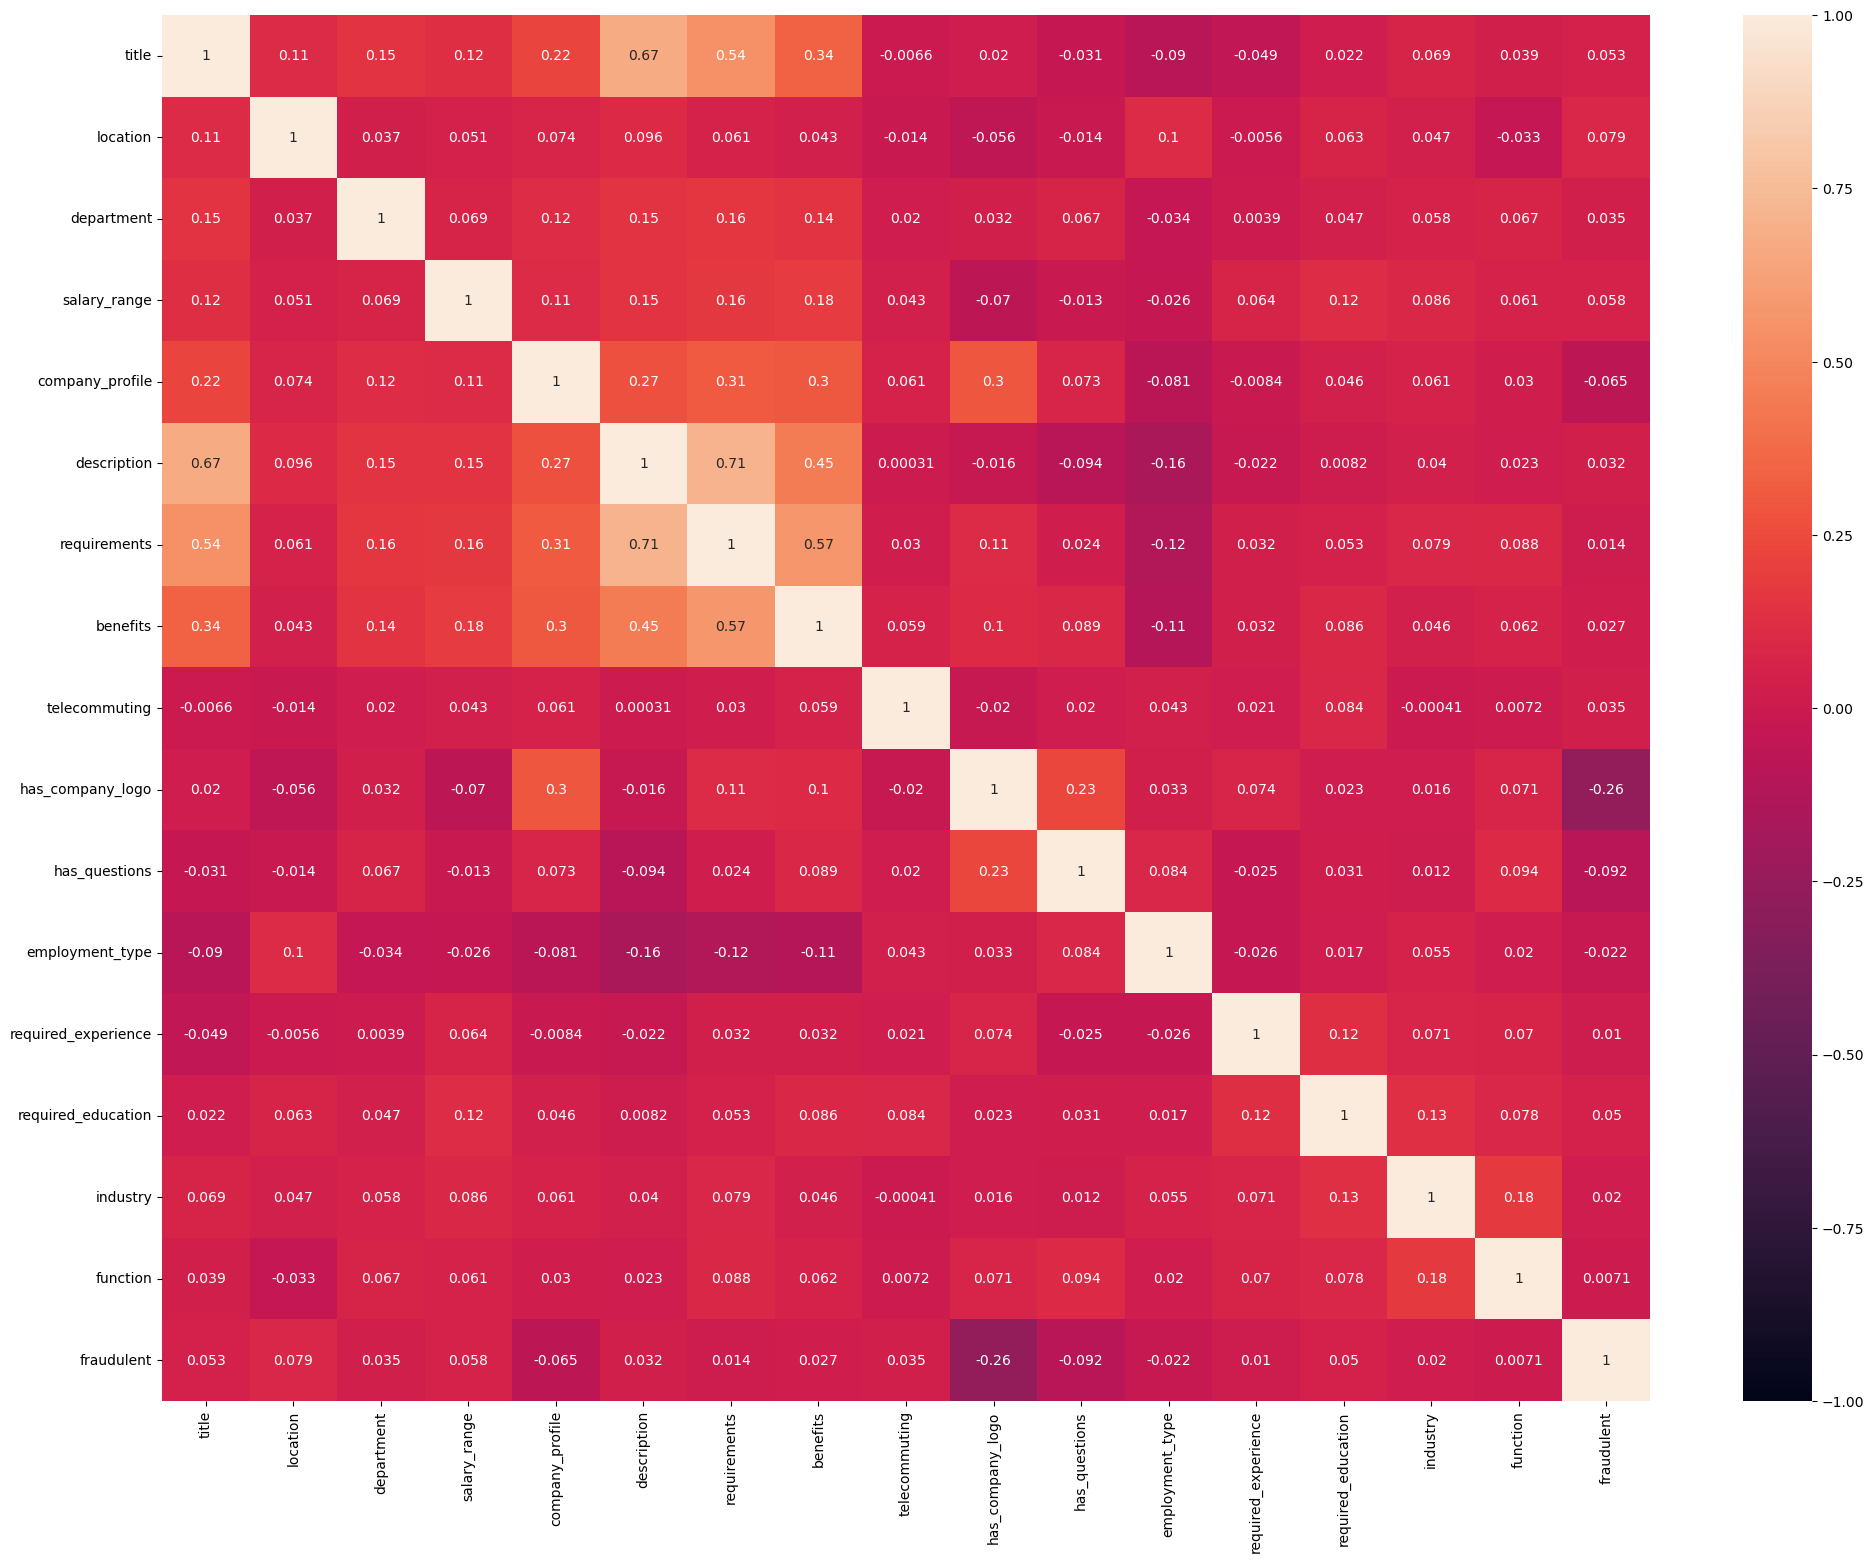

In [5]:
# Correlation Between Attributes
# import matplotlib.pyplot as plt
# import seaborn as sns

try:
    corr_matrix= df.corr()
    
    #To check correlation with the target variable
    print(corr_matrix[target_variable].sort_values(ascending=False))
    
    plt.figure()
    fig, ax = plt.subplots(figsize=(24, 18))
    sns.heatmap(df.corr(), vmin=-1, vmax=1.0, annot=True)
    plt.savefig('corr_matrix.png')
    plt.show()
    
except Exception as e:
   print("error_preprocess1")
   print (str(e))


title                  0.420581
location               1.531689
department             3.095182
salary_range           4.010226
company_profile        1.443815
description            0.101682
requirements           0.346132
benefits               1.053831
telecommuting          4.512188
has_company_logo      -1.463895
has_questions          0.033117
employment_type        2.328979
required_experience    1.007064
required_education     2.741186
industry               2.068877
function               2.162060
fraudulent             4.207199
dtype: float64


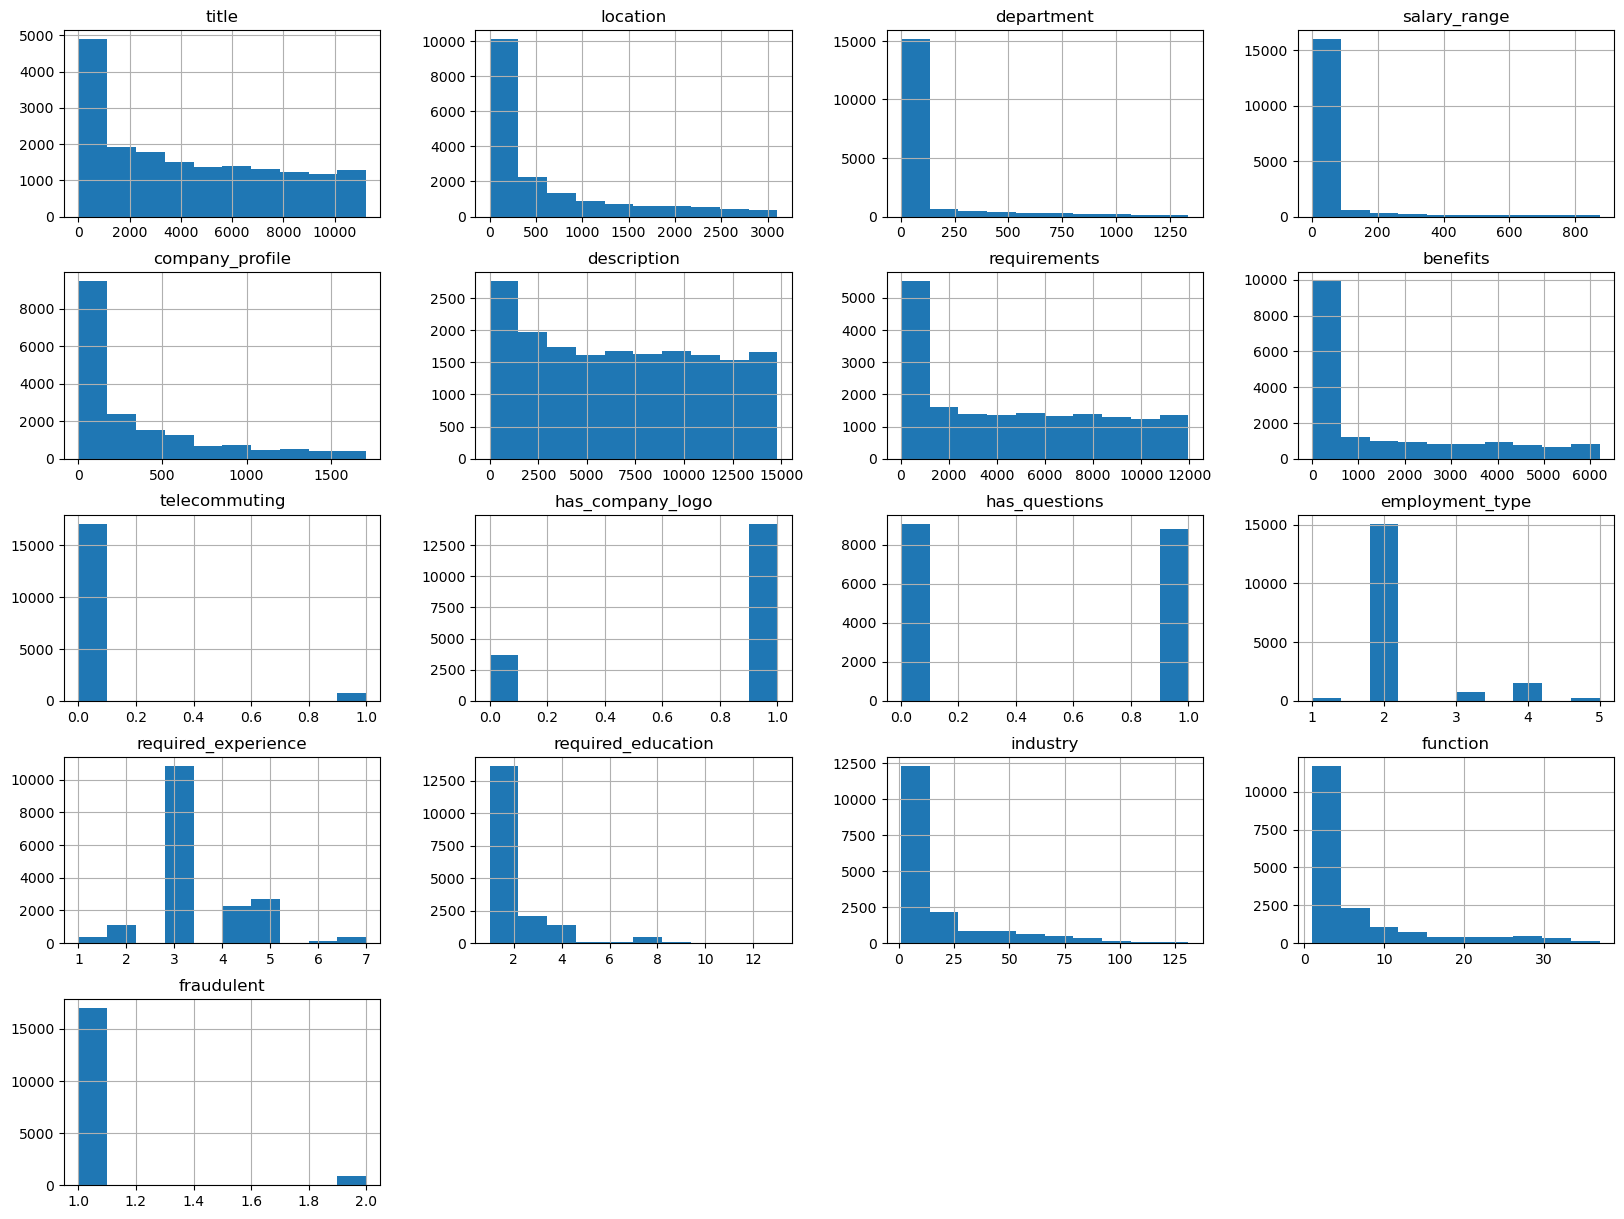

DELTA: 2023-04-27 10:32:00.023078


In [6]:
# Skew of Univariate Distributions
# The skew result can show us a positive (right) or negative (left) skew. Values closer to zero show less skew
try:
    print(df.skew())

    # It is better to use some data visualization to get a better idea.
    
    # Plot univariate distributions
    df.hist(bins=10, figsize=(20, 15))
    plt.savefig('Univariate_Distributions.png')
    plt.show()

    # Plot multivariate analysis
#     sns.pairplot(df, hue=target_variable)
#     plt.savefig('multivariate_analysis.png')
#     plt.show()
except Exception as e:
    print("errorUnivariate1")
    print(str(e))

print("DELTA:", datetime.now())


title                  0.420581
location               1.531689
department             3.095182
salary_range           4.010226
company_profile        1.443815
description            0.101682
requirements           0.346132
benefits               1.053831
telecommuting          4.512188
has_company_logo      -1.463895
has_questions          0.033117
employment_type        2.328979
required_experience    1.007064
required_education     2.741186
industry               2.068877
function               2.162060
fraudulent             4.207199
dtype: float64


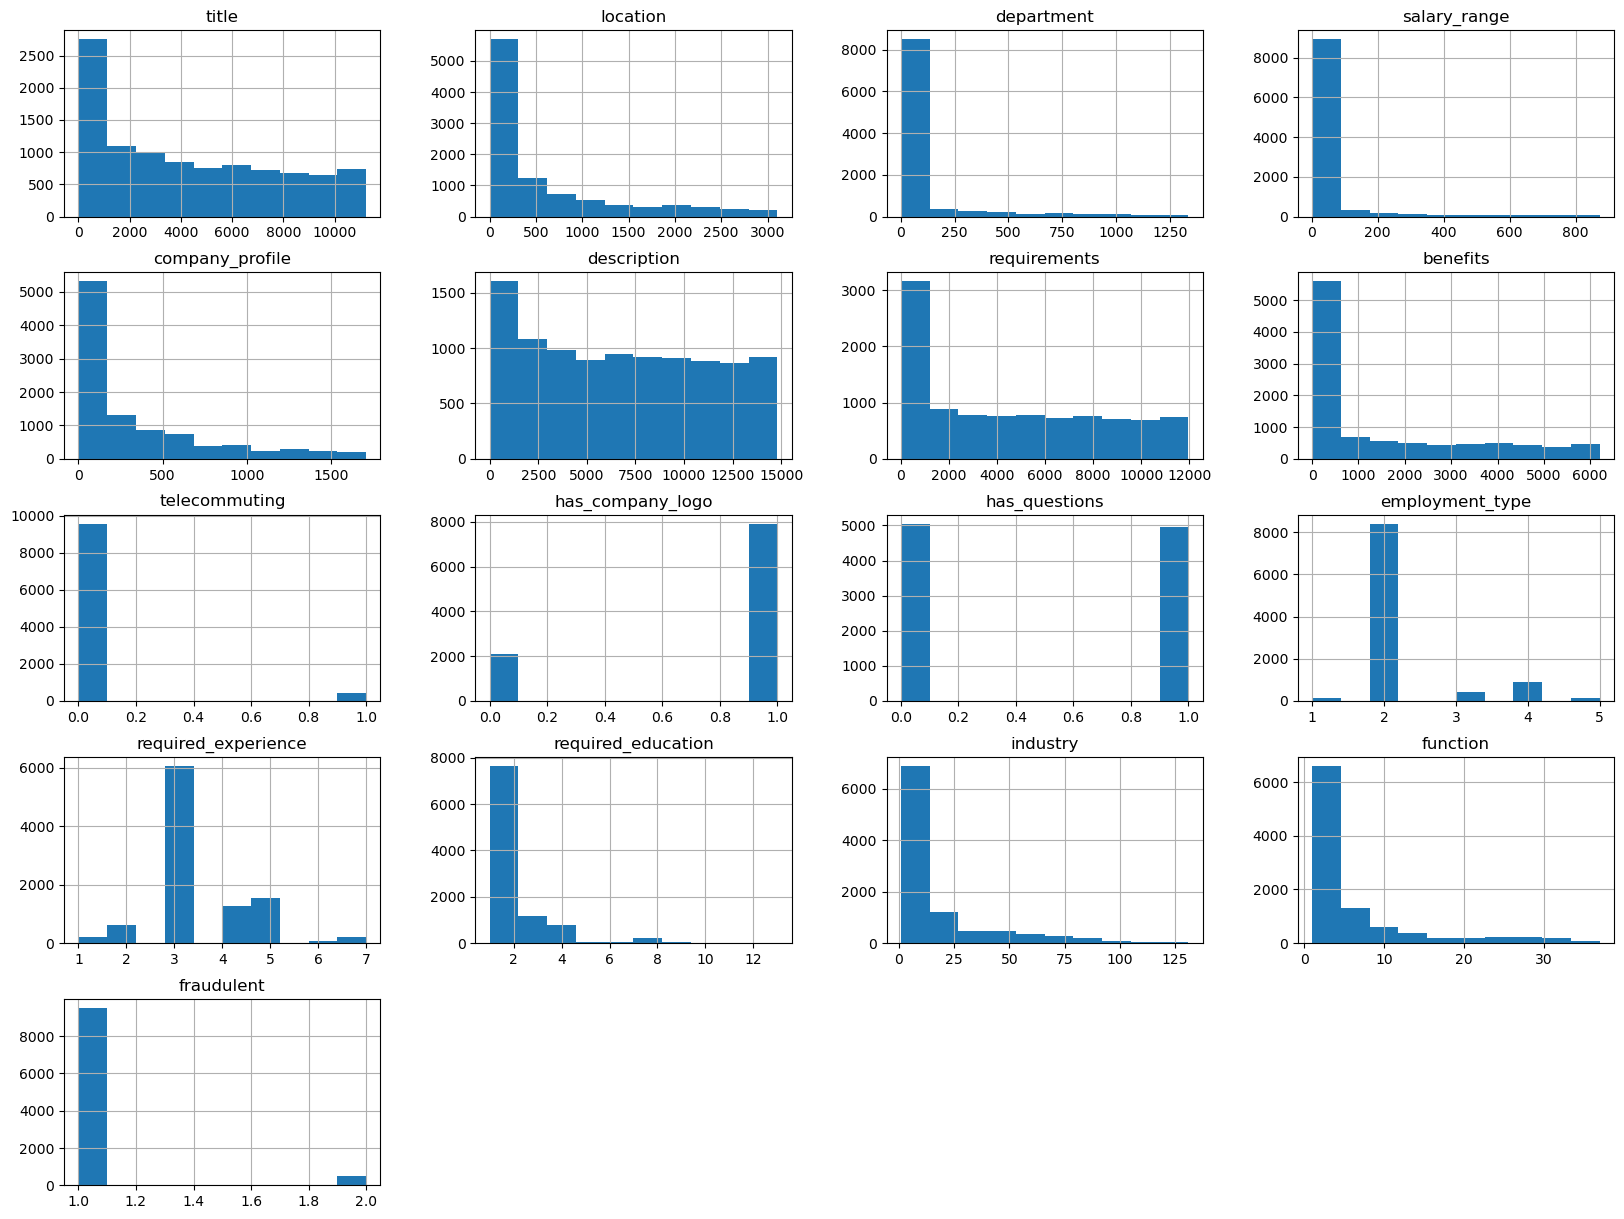

DELTA: 2023-04-27 10:32:01.423637


In [7]:
# Skew of Univariate Distributions
# The skew result can show us a positive(right) or negative (left) skew. Values closer to zero show less skew
try:
    print(df.skew())

    # Subsample the data
    sample_size = 10000
    if df.shape[0] > sample_size:
        df_sample = df.sample(n=sample_size, random_state=42)
    else:
        df_sample = df

    # Plot univariate distributions
    from matplotlib import pyplot as plt
    df_sample.hist(bins=10, figsize=(20, 15))
    plt.savefig('Univariate_Distributions.png')
    plt.show()

    # Plot multivariate distributions
#     import seaborn as sns
#     if target_variable in df_sample:
#         sns.pairplot(df_sample, hue=target_variable)
#     else:
#         sns.pairplot(df_sample)
#     plt.savefig('multivariate_analysis.png')
#     plt.show()

except Exception as e:
    print("errorUnivariate1")
    print(str(e))

print("DELTA:", datetime.now())


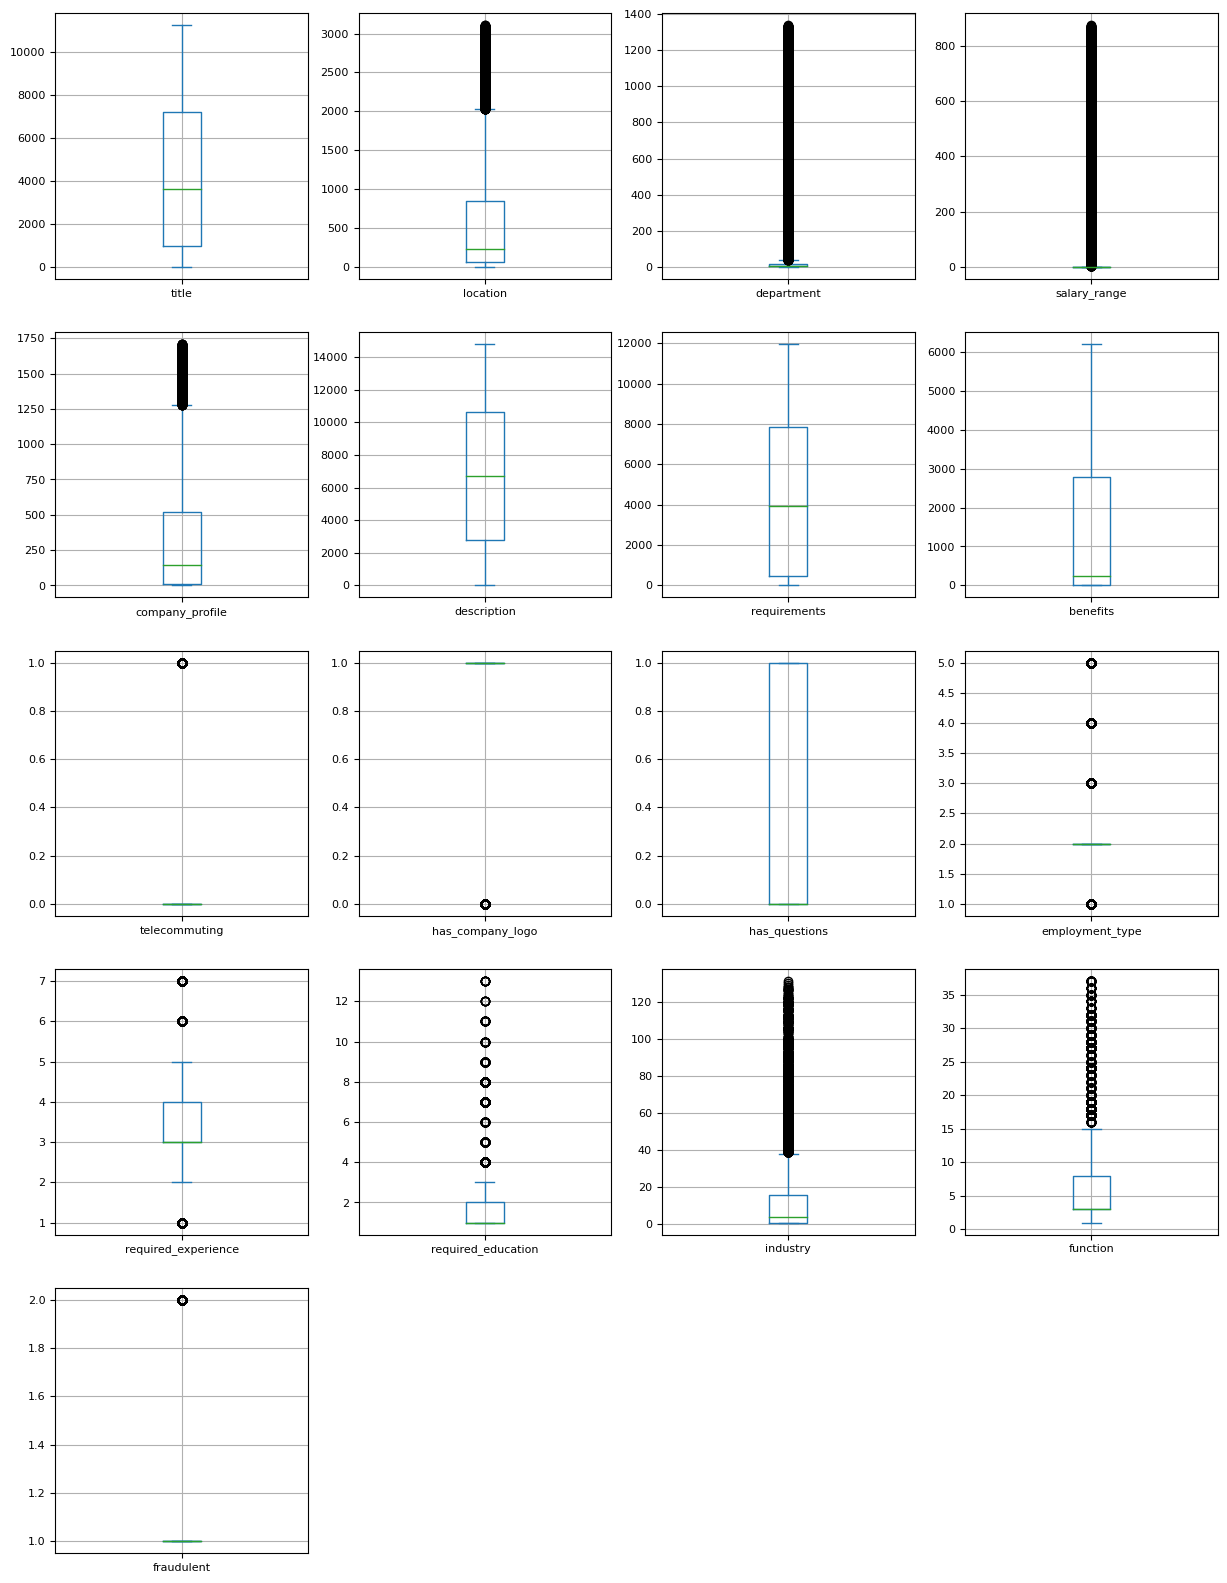

In [8]:

fig, ax = plt.subplots(figsize=(15, 20))
df.plot(kind='box', subplots=True, grid=True, layout=(5, 4), sharex=False, sharey=False, fontsize=8, ax=ax)
ax.set_xlabel("Features")
ax.set_ylabel("Values")
ax.set_title("Box plot of features in dataset")
plt.savefig('boxplot.png')
plt.show()


title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64
title
False    17880
Name: title, dtype: int64
location
False    17880
Name: location, dtype: int64
department
False    17880
Name: department, dtype: int64
salary_range
False    17880
Name: salary_range, dtype: int64
company_profile
False    17880
Name: company_profile, dtype: int64
description
False    17880
Name: description, dtype: int64
requirements
False    17880
Name: requirements, dtype: int64
benefits
False    17880
Name: benefits, dtype: int64
telecommuting
False    17880
Name: telecommuting, dtype: int64
has_company_logo
False    17880
Name: has

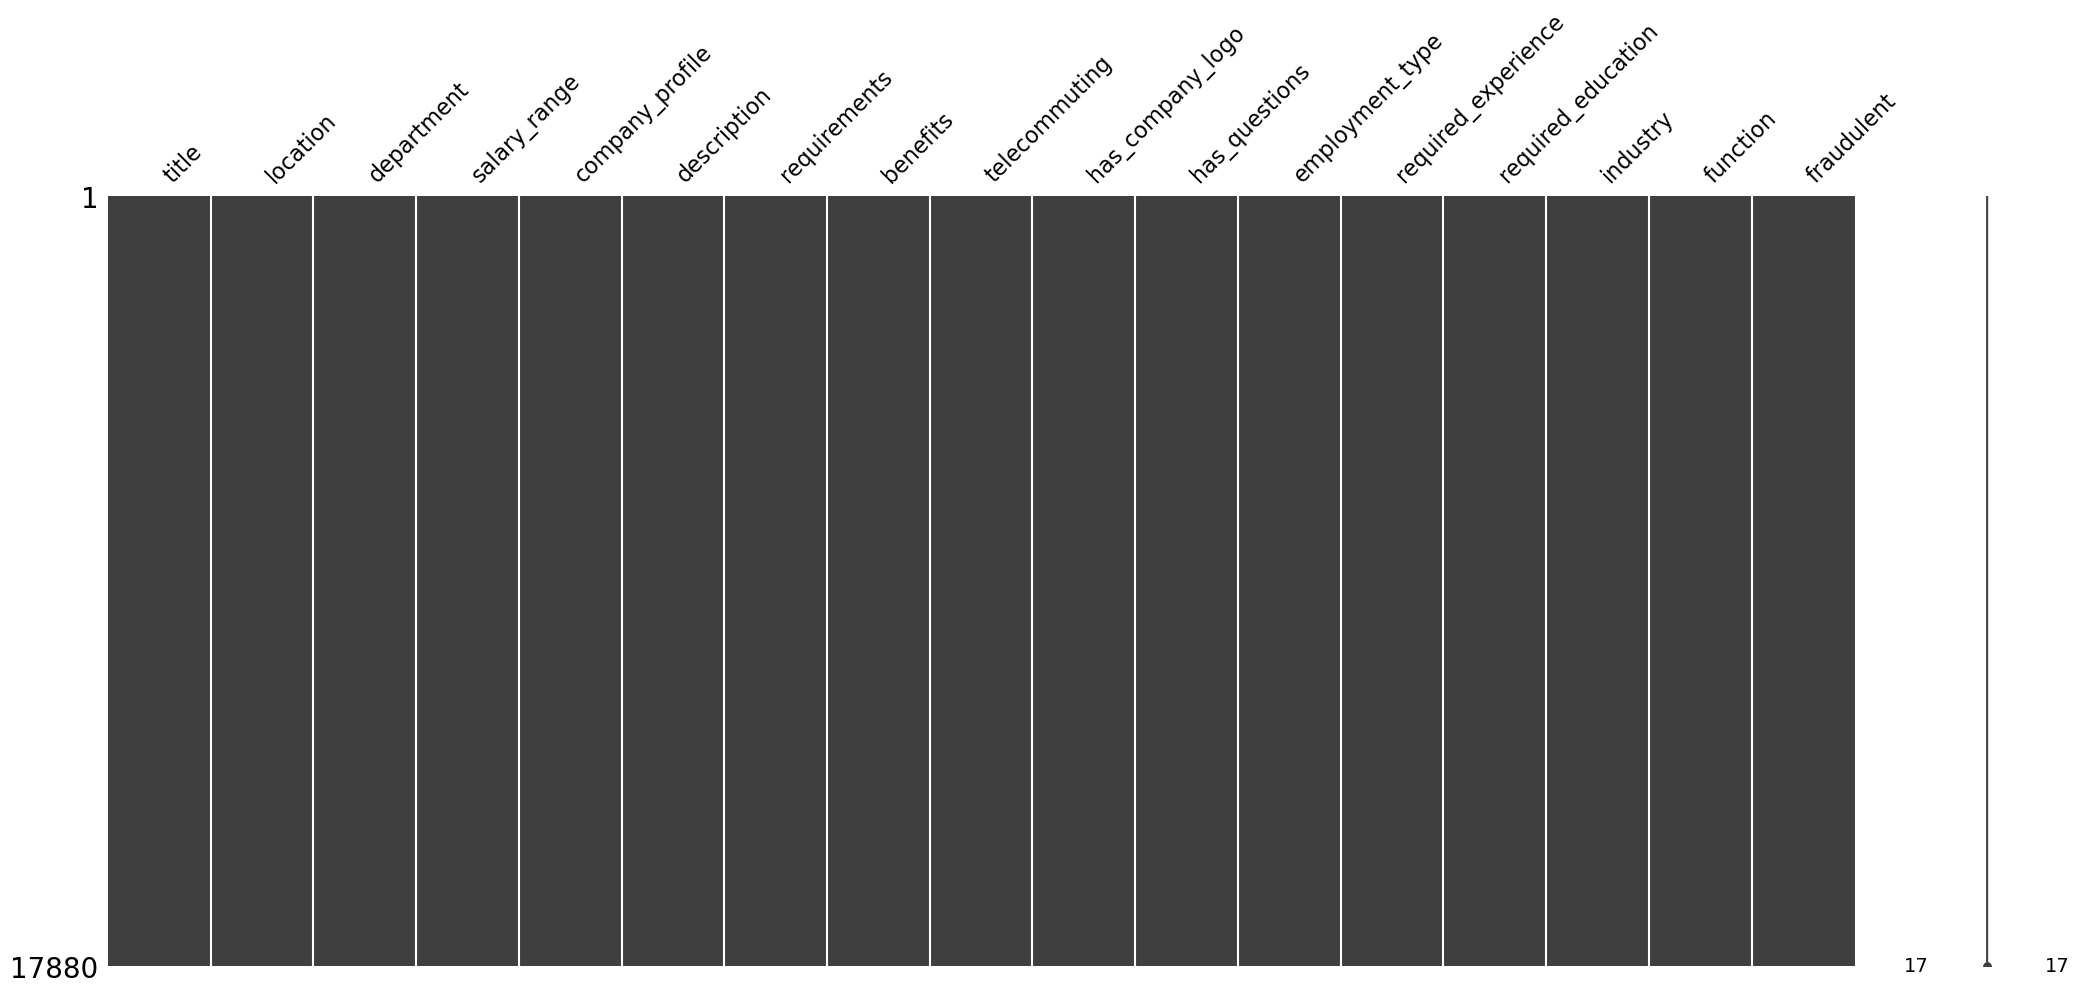

         title  location  department  salary_range  company_profile  \
0          NaN       NaN         NaN           NaN              NaN   
1          NaN       NaN         NaN           NaN              NaN   
2          NaN       NaN         NaN           NaN              NaN   
3          NaN       NaN         NaN           NaN              NaN   
4          NaN       NaN         NaN           NaN              NaN   
...        ...       ...         ...           ...              ...   
17875  11230.0       NaN         NaN           NaN              NaN   
17876      NaN       NaN         NaN           NaN              NaN   
17877  11231.0       NaN         NaN           NaN              NaN   
17878      NaN       NaN         NaN           NaN              NaN   
17879      NaN       NaN         NaN           NaN              NaN   

       description  requirements  benefits  telecommuting  has_company_logo  \
0              NaN           NaN       NaN            NaN           

In [9]:
import missingno as msno

try:
    missing_data = df.isnull()
    print(missing_data.sum())
    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print("================================")

    # Finding the percentage of missing data
    print(round(((missing_data.sum() / len(missing_data)) * 100), 4))
    
    # Visualize missing data
    msno.matrix(df)
    plt.savefig('missing_data.png')
    plt.show()
    
    # Check for outliers in the dataset
    q = df.quantile(0.99)
    print(df[df > q])
    print(df.dtypes) # Check the types
    
except Exception as e:
    print("error_Missing Data")
    print(str(e))


binary
binary
binary
[0 0 0 ... 0 0 0]
               Specs          Score
0              title  140210.670310
1           location  113839.715396
5        description   52364.263524
4    company_profile   42011.328249
7           benefits   33488.294528
3       salary_range   26033.708249
2         department   13768.114173
6       requirements   11907.620857
9   has_company_logo     251.182084
14          industry     249.360831


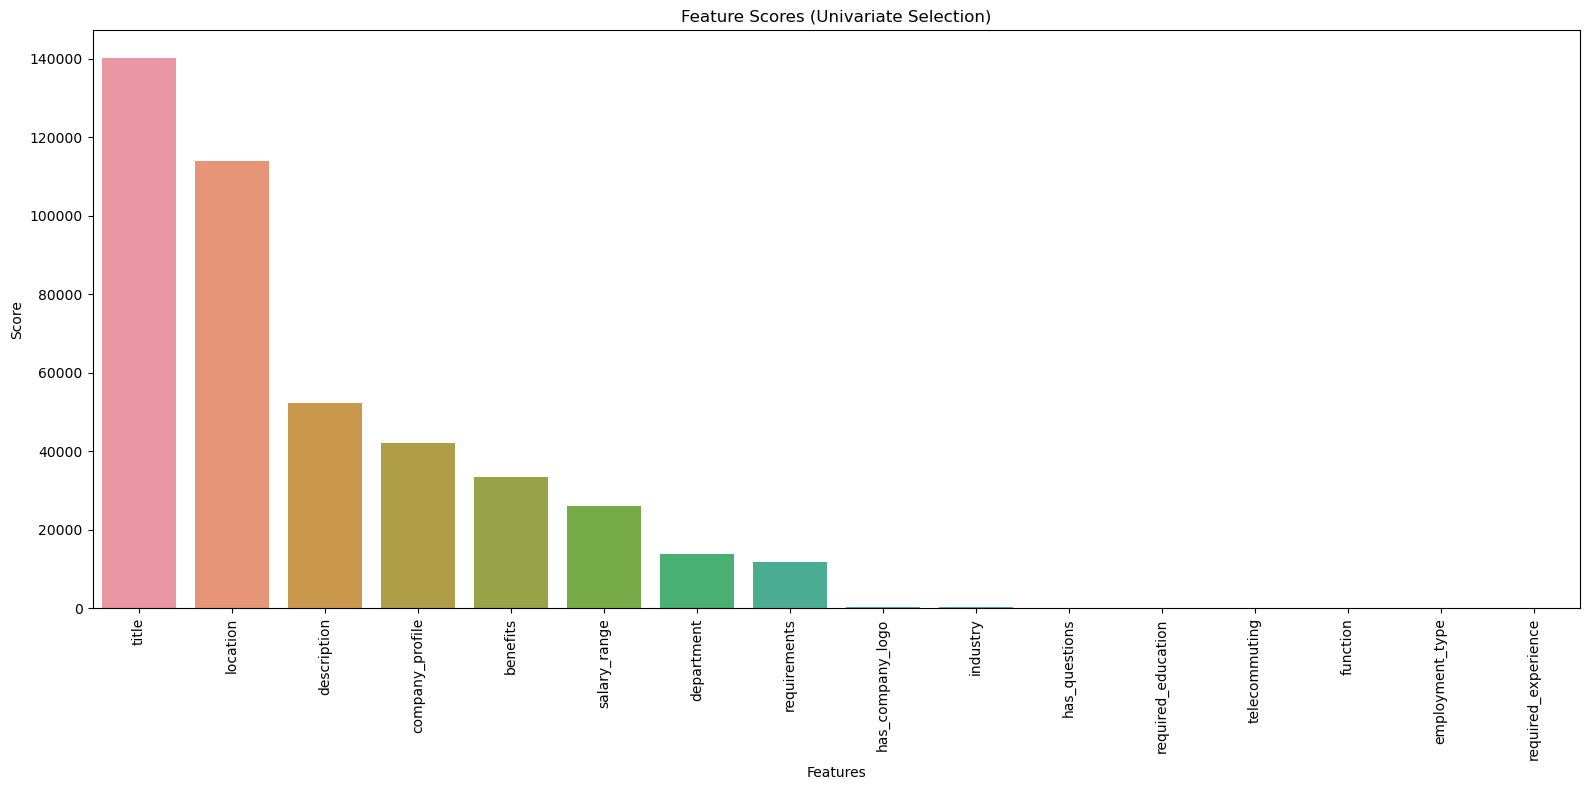

[0.11532473 0.10257363 0.05569522 0.0350816  0.06342567 0.12563358
 0.09130817 0.0684619  0.01077324 0.07037698 0.01826888 0.02957177
 0.03722434 0.04567129 0.07637726 0.05423176]


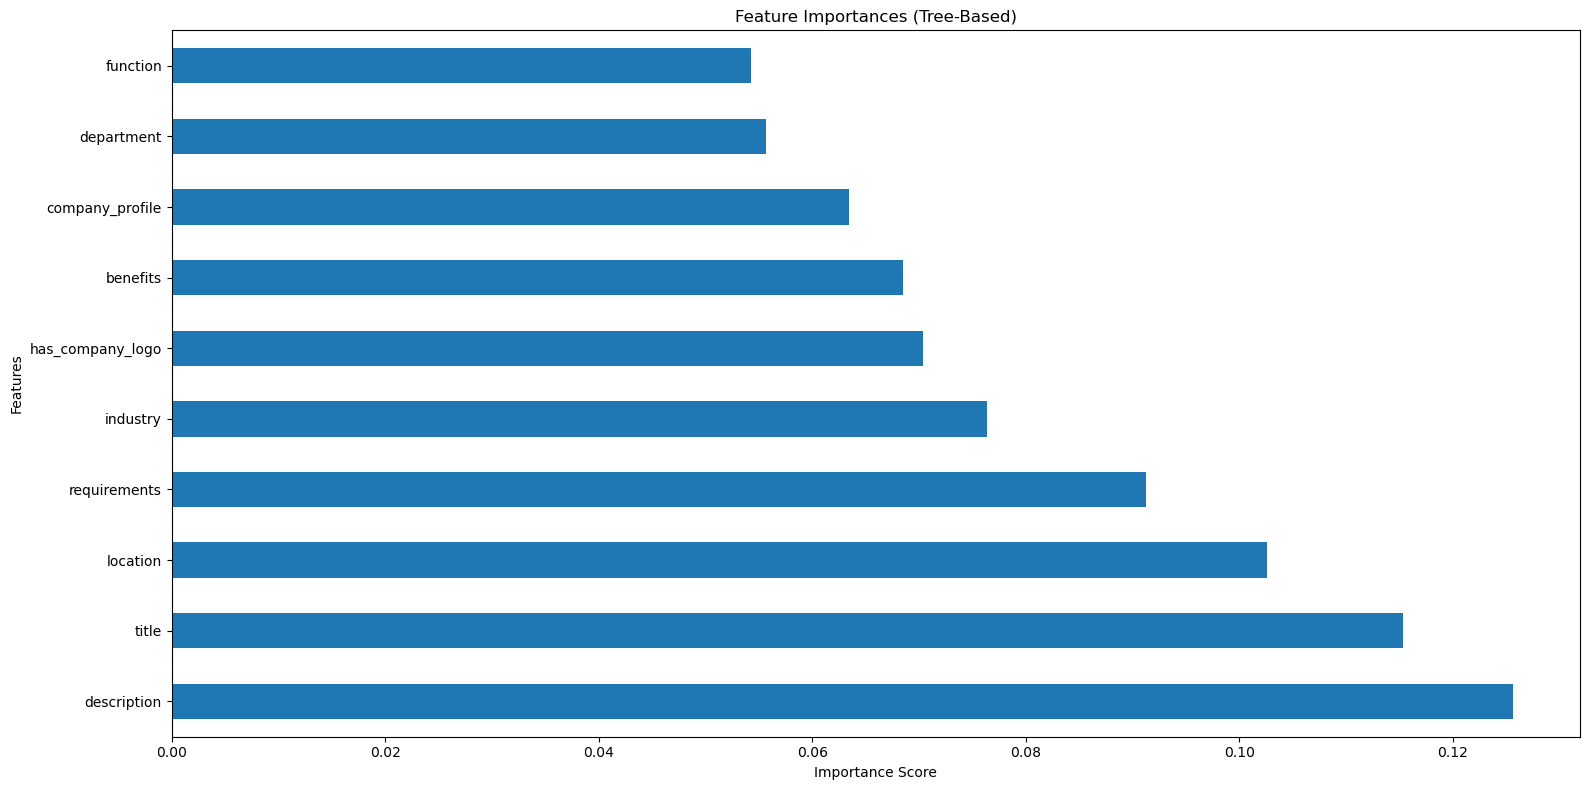

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import utils

try:
    X = df.drop(target_variable, axis=1)
    y = df[target_variable]

    lab_enc = preprocessing.LabelEncoder()
    training_scores_encoded = lab_enc.fit_transform(y)
    print(utils.multiclass.type_of_target(y))
    print(utils.multiclass.type_of_target(training_scores_encoded.astype('int')))
    print(utils.multiclass.type_of_target(training_scores_encoded))
    print(training_scores_encoded)

    # 1. Univariate Selection
    # Apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k='all')
    fit = bestfeatures.fit(X, training_scores_encoded)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    # Concatenate two dataframes for better visualization
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']  # Name the dataframe columns
    print(featureScores.nlargest(10, 'Score'))  # Print 10 best features

    # Visualize feature scores
    plt.figure(figsize=(16, 8))
    sns.barplot(x='Specs', y='Score', data=featureScores.sort_values('Score', ascending=False))
    plt.xticks(rotation=90)
    plt.title('Feature Scores (Univariate Selection)')
    plt.xlabel('Features')
    plt.ylabel('Score')
    plt.tight_layout()
    plt.savefig('feature_scores_univariate.png')
    plt.show()

    # 2. Feature Importance
    model = ExtraTreesClassifier(n_estimators=100)
    model.fit(X, training_scores_encoded)
    print(model.feature_importances_)  # Print feature importances

    # Visualize feature importances
    plt.figure(figsize=(16, 8))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title('Feature Importances (Tree-Based)')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.savefig('feature_importances_tree.png')
    plt.show()

except Exception as e:
    print("Error in Feature Selection")
    print(str(e))


In [11]:
# Scale the data using MinMaxScaler
try:
    scaler = MinMaxScaler(feature_range=(0, 1))
    rescaledX = scaler.fit_transform(X)

    # RF ensemble setup
    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Create training and testing sets
    # y = y.values
    X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.3, random_state=42)
    print(X_train.shape)
    print("Training set shape: ", X_train.shape, y_train.shape)
    print("Testing set shape: ", X_test.shape, y_test.shape)
    
except Exception as e:
    print("Error during training and testing setup")
    print(str(e))


(12516, 16)
Training set shape:  (12516, 16) (12516,)
Testing set shape:  (5364, 16) (5364,)


In [12]:
# create an imputer object with median strategy
imputer = SimpleImputer(strategy='mean')

# impute missing values in X_train and X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    if ax is None:
        ax = plt.gca()

    # Plot the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)

    # create a meshgrid for decision boundary visualization
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    ax.set_title('Classifier Decision Boundary', fontsize=14)
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")


(12516, 16) (12516,)
(5364, 16) (5364,)
Model Ensemble Voting:Max Vote
C:\Users\Dino\Template_Project\Template trails


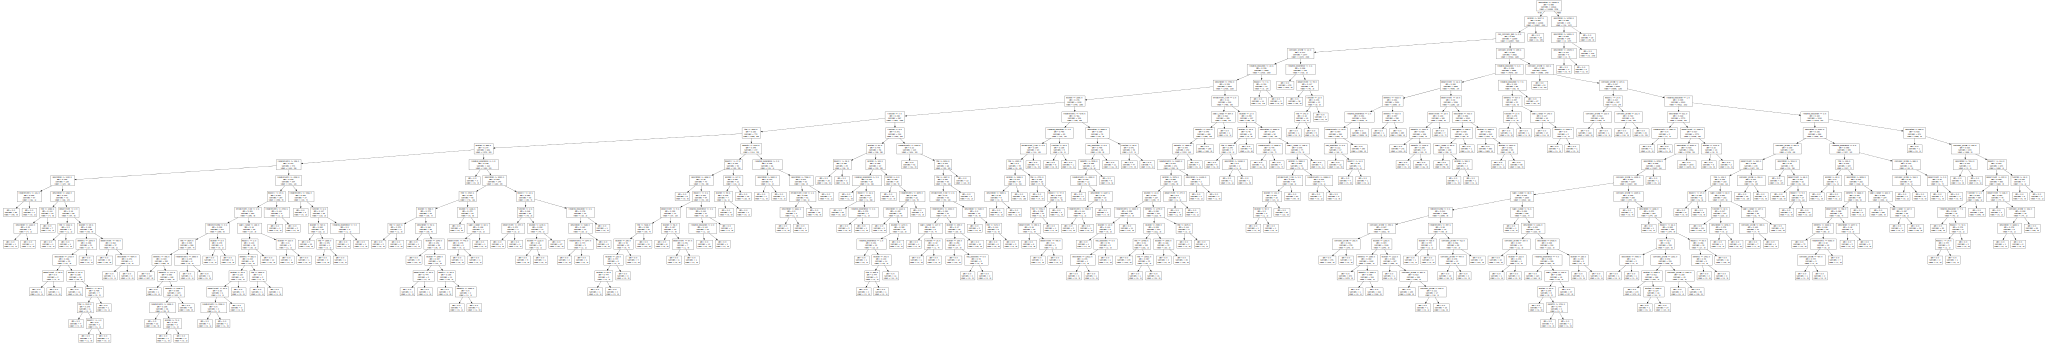

error Visualize1
(slice(None, None, None), 0)
lenTestX= 5364  lenTesty= 5364
lenTrainX= 12516  lenTrainy= 12516
vote1= 0.9714765100671141
vote2= 0.948173005219985
Actual : DecisionTree= 0.9714765100671141 ,KNN= 0.948173005219985 , LogisticReg= 0.9459358687546607
 
Model Ensemble Voting:Averaging
Actual: DecisionTree =  0.9714765100671141 , KNN =  0.948173005219985 , LogisticReg =  0.9459358687546607


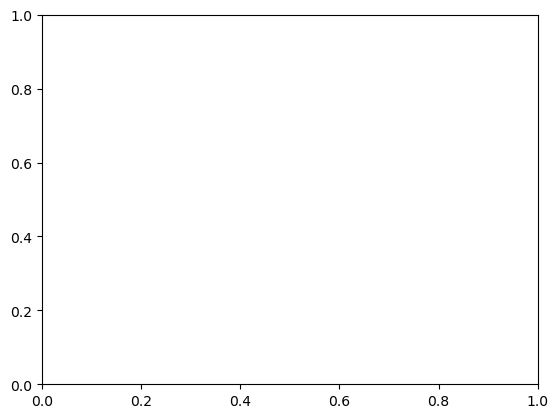

In [18]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.ensemble import VotingClassifier

#Load the test,train data.
try:

 scaler = MinMaxScaler(feature_range=(0, 1))
 rescaledX = scaler.fit_transform(X)

#rf ensemble setup
 # create training and testing vars
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 print (X_train.shape, y_train.shape)
 print (X_test.shape, y_test.shape)
 
except Exception as e:
    print("training and testing error")
    print (str(e))


try:
#rf ensemble Max Vote

 print("Model Ensemble Voting:Max Vote")
 print("===============================")
 model1 = DecisionTreeClassifier(random_state=42)
 model2 = KNeighborsClassifier()
 model3= LogisticRegression(random_state=42)

 model1.fit(X_train,y_train)

 try:
  from subprocess import call
  import os, sys
  print(os.getcwd())
  file="tree2.dot"
  dotfile = open(file, 'w')
  tree.export_graphviz(model1, out_file=dotfile, feature_names=X_train.columns)
  dotfile.close()
  file1=os.getcwd()+"\\"+file
  import pydot

  os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
  (graph,) = pydot.graph_from_dot_file(file1)
  graph.write_png('somefile.png')
  call(['dot', '-Tpng', file1, '-o', 'tree.png'])
  # display(tree.export_graphviz(model1))
  Source(tree.export_graphviz(model1, out_file=None, feature_names=X_train.columns))
  graph = Source(tree.export_graphviz(model1, out_file=None, feature_names=X_train.columns))
  display(graph)
  SVG(graph.pipe(format='svg'))
  graph = Source(tree.export_graphviz(model1, out_file=None, feature_names=X_train.columns))
  graph.format = 'png'
  graph.render('dtree_render', view=True)
  dotfile = open("dtree1.dot", 'w')
  tree.export_graphviz(model1, out_file=dotfile, feature_names=X_train.columns)
  dotfile.close()
  system("dot -Tpng .dot -o dtree2.png")
  visualize_classifier(model1, X, y)
 except Exception as e:
    print("error Visualize1")
    print (str(e))

 model2.fit(X_train,y_train)
 model3.fit(X_train,y_train)

 pred1=model1.predict(X_test)
 pred2=model2.predict(X_test)
 pred3=model3.predict(X_test)

    
 score1=model1.score(X_test,y_test)
 score2=model2.score(X_test,y_test)
 score3=model3.score(X_test,y_test)

#  gs = gridspec.GridSpec(2, 2)
#  fig = plt.figure(figsize=(10, 8))

#  labels = ['DecisionTreeClassifier','KNN','Logistic Regression']
#  counter=0;
#  for clf, lab, grd in zip([model1, model2, model3],
#                          labels,
#                          itertools.product([0, 1], repeat=2)):
#     clf.fit(X, y)
#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X=X, y=y, clf=clf)
#     plt.title(lab)
#     name = 'ensemble'+str(counter)
#     counter=counter+1
#     plt.savefig(name)

 print("lenTestX=",len(X_test)," lenTesty=",len(y_test))
 print("lenTrainX=",len(X_train)," lenTrainy=",len(y_train))

 final_pred = np.array([])
    
 for i in range(0,len(X_test)):
  final_pred =  mode([pred1[i], pred2[i], pred3[i]])
  #print("Predict ",i,": ",pred1[i],",",pred2[i],",",pred3[i],"vote1=",final_pred[0])
   

 model = VotingClassifier(estimators=[('lr', model1), ('knn', model2), ('dt', model2)], voting='hard')
 model.fit(X_train, y_train)
    
 # Evaluation of Ensemble scores
 print("vote1=",score1)  #since vote1 matches exactly what DecisionTree predicted (score1)
 print("vote2=",model.score(X_test,y_test))
 print("Actual: DecisionTree =",score1,", KNN =",score2,", LogisticReg =",score3)
 
except Exception as e:
    print("error Ensemble Max Vote evaluation")
    print (str(e))

#rf ensemble Averaging
print(" ")
print("Model Ensemble Voting:Averaging")
print("===============================")
try:
 model1 = DecisionTreeClassifier()
 model2 = KNeighborsClassifier()
 model3= LogisticRegression()

 model1.fit(X_train,y_train)
 model2.fit(X_train,y_train)
 model3.fit(X_train,y_train)

 pred1=model1.predict_proba(X_test)
 pred2=model2.predict_proba(X_test)
 pred3=model3.predict_proba(X_test)
 
# runningAvgNumerator=0
#  for i in range(0,len(X_test)):
#   print("probability ",i,": ",pred1[i][0],pred2[i][0],pred3[i][0], ". Probabilty Avg=",(pred1[i][0]+pred2[i][0]+pred3[i][0])/3)
  
 score1=model1.score(X_test,y_test)
 score2=model2.score(X_test,y_test)
 score3=model3.score(X_test,y_test)

 print("Actual: DecisionTree =",score1,", KNN =",score2,", LogisticReg =",score3)
 
  
 
except Exception as e:
    print("error Ensemble Average Vote evaluation")
    print (str(e))
